    Author: Aaron Strangfeld 
    Date:   26.05.2019

# 1. Introduction
In this notebook we will go through a numerical method for the simulation of a Bose-Einstein condensate (BEC) in two dimensions. For this, we will first discuss the theoretical background of this phenomenon from the statistical physics point of view. This will allow us to get some intuition as to why we should expect something special to happen with a bunch of bosons at low temperatures, at all. However, after that we will use quantum theory and the Schrödinger equation to derive a non-linear differential equation, namely the Gross-Pitaevskii equation, to model the time evolution of the condensate. 

Our goal is to make this notebook as interactive as possible. Therefore, we will show plots with sliders for the parameters relevant to the relations shown. In this way you can explore those hands on and get a feeling for their meaning.

Let us add some advice to avoid displaying issues. Don't use the Run All command in the notebook as different settings for the matplotlib package could interfere by doing so. Better go through the notebook cell by cell. Before using the notebook go sure that you have installed the following packages:
 - ffmpeg ([Installation of FFmpeg](https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg))
 - Jupyter widgets ([Installation of Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/user_install.html))
 - mpmath ([Installation of mpmath](http://mpmath.org/doc/1.1.0/setup.html)) 

otherwise restart follow the installation guides and restart your Jupyter notebook.


# 2. Bose-Einstein Statistics
To allow a brief description of Bose-Einstein statistics this section won't cover a complete introduction to statistical physics itself. In case you feel uncomfortable with the following way of reasoning, please consult basic literature to the topic. ([Introduction to Statistical Mechanics](https://web.stanford.edu/~peastman/statmech/index.html))

We want to describe the thermodynamic behaviour of an ideal gas of bosons in equilibrium. The gas is isolated and thus, we maximize entropy under fixed mean energy and particle number. This allows us to draw the connection between the system's microscopic to its macroscopic behaviour by using the approach of the grand canonical partition function:

\begin{equation}
Z_{GC} = \sum_{\nu} e^{\frac{\mu N_{\nu}-E_{\nu}}{k_bT}}
\end{equation}

where $\nu$ defines the microstate of the system with corresponding particle number $N_{\nu}$ and energy $E_{\nu}$. The Temperature $T$ and the chemical potential $\mu$ characterize the equilibrium for which we maximized the entropy. Finally, $k_b$ stands for the Boltzmann constant. This approach is of significant utility as we can use the following relations:

\begin{equation}
\Omega = -k_bT\ln{Z_{GC}}=-pV \qquad N = -\frac{\mathrm{d}\Omega}{\mathrm{d}\mu}
\end{equation}

After some combinatorical arguments we will arrive at:

\begin{equation}
N = \sum_i n_i \qquad n_i= \frac{1}{\sigma^{-1}e^{e_i/k_bT}-1}
\end{equation}

This is the well known Bose statistics. It tells us how many particles $n_i$ we expect to occupy the energy state with energy $e_i$ at temperature T and fugacity $\sigma$. We defined the latter as $\sigma = e^{\frac{\mu}{k_bT}}$.

We want to make the transition from discrete energy levels to the continuum and transform the sum over states to an integral in 6-dimensional phase space where each state is of volume $h^3$:

\begin{equation}
\sum_i \rightarrow \frac{V}{h^3}\int d^3\vec{p}
\end{equation}

Here, $h$ is the Planck constant, $V$ is the volume of the box we put the particles in and $\vec{p}$ is the momentum of the state. Note that by doing so we use a semiclassical approximation for the ideal bose gas. Thereby the description isn't general anymore but we still get the results we are looking for in case of not-interacting bosons. Keep in mind that we don't have to use this approximation here but we do it to keep the following derivation simple. 

Back to the formula: to relate the energy of the states to its momentum, we need to introduce a dispersion relation for in this case massive bosons:

\begin{equation}
e=\frac{p^2}{2m}
\end{equation}

with the mass being $m$. We need to pay attention on the ground state with energy $e_0 = 0$:

\begin{equation}
N_0 = \frac{1}{\sigma^{-1}e^{\frac{e_0}{k_bT}}-1}=\frac{1}{\sigma^{-1}-1}
\end{equation}

The number of particles $N_0$ diverges for $\sigma \rightarrow 1$, which corresponds to a chemical potential of $\mu=0$. Approximating the sum by the integral leads to the following representation of the number of particles:

\begin{equation}
N = \frac{4\pi V}{h^3} \int_0^{\infty} dp p^2 \frac{1}{\sigma^{-1}e^{p^2/2mk_bT}-1}
\end{equation}

At the boundary $p=0$, cooresponding to $e=0$, the contribution to the integral is $0$ due to the $p^2$ term. Later we want to have a closer look onto the limit described before. Then, $N_0$ will play a significant role in contributing to the particle number $N$. Therefore, we decide to extract it from the integral and write:

\begin{equation}
N=\sum_i \frac{1}{\sigma^{-1}e^{\frac{e_i}{k_bT}}-1} \rightarrow \frac{1}{\sigma^{-1}-1}+\frac{4\pi V}{h^3} \int_0^{\infty} dp p^2 \frac{1}{\sigma^{-1}e^{p^2/2mk_bT}-1}
\end{equation}

The integral can be solved by substituiton and a polylogarithmic function $g_{3/2}(\sigma)=\sum_{j=1}^{\infty}\frac{\sigma^j}{j^{3/2}}$:

\begin{equation}
N=\frac{\sigma}{1-\sigma}+\frac{V}{\lambda^3}g_{3/2}(\sigma) \qquad \lambda = \left[\frac{h^2}{2\pi mk_bT} \right]^{1/2}
\end{equation}

We will now use this equation to analyse the thermodynamical behaviour of the Bose gas.
Let's consider constant particle density $n=N/V$ at large volume $V>>1$ with $\sigma< 1$:

\begin{equation}
n=\frac{1}{V}\frac{\sigma}{1-\sigma}+\frac{1}{\lambda^3}g_{3/2}(\sigma)\approx \frac{1}{\lambda^3}g_{3/2}(\sigma)
\end{equation}

Have a look at the following Diagram. The thick lines correspond to constant particle density while the surface shown as a wireframe represents all possible states of the system.
There is a slider with which you can change the number of spacial dimensions the gas is embedded in. We will come to different dimensions later but you can explore already.

<IPython.core.display.Javascript object>


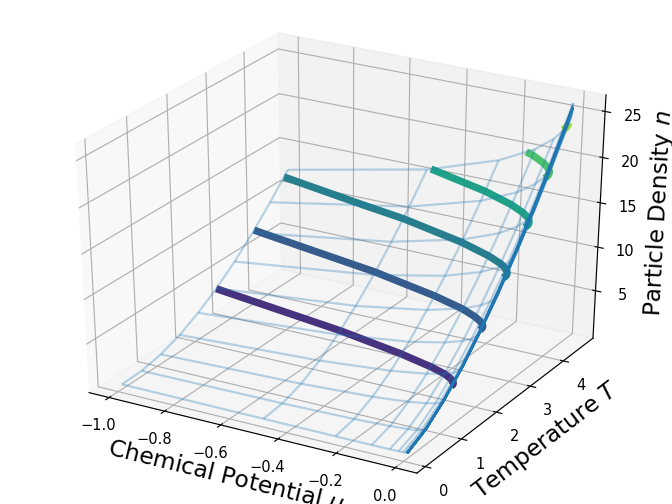

interactive(children=(IntSlider(value=3, description='Dimensions:', max=4, min=1), Output()), _dom_classes=('w…

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 1
%aimport condensation
condensation.plot();

This notebook is all about Bose-Einstein condensation. It is not surprising that we are interested in what happens to the gas if we decrease the temperature. To keep the particle density constant we need to follow one of the thick lines in the diagram above. We observe that lowering the temperature requires an increase in the chemical potential up to zero. The following question is coming up now: can we follow the line till $T=0$ and $\mu=0$ or $\sigma=1$, respectively? If not, what will happen below the temperature that we can go down to following the line? 

We are restricted to finite resolution in the diagram above. Thus, we need to analyse the equation mathematically to check this. We will continue by considering three dimensional space first and we will answer the question of a minimal temperature along the graph for constant particle density. The major restriction to the system is $\sigma<1$. In the limit $\sigma \rightarrow 1$ we get:

\begin{equation}
n=\frac{1}{\lambda^3}g_{3/2}(1)
\end{equation}

As $\lambda$ is temperature dependent we can solve this equation for $T$ at fixed particle density $n$. We define the critical temperature $T_c$ as follows:

\begin{equation}
T_c = \frac{h^2}{2\pi mk_b}\left[\frac{n}{g_{3/2}(1)}\right]^{2/3}
\end{equation}

$T_c$ is only zero for $n=0$. Otherwise we get a temperature limit. We will continue with this after a short discussion of other dimensions than three. The general solution of the integral in $d$ dimensions contains the polylogarithmic function $g_{d/2}(\sigma)$. For any integer dimensionality $d<3$ we get the limit: $\lim_{\sigma\rightarrow 1} g_{d/2}(\sigma)=\infty$. This shows mathematically what we could have suspected by having a look at the diagram above. In one or two dimensions we can follow the graph of constant particle density till $T=0$. There is no need for the introduction of a critical temperature like in three or hypothetically higher numbers dimensions. Thus, we will come back to the three dimensional bose gas now. What will happen at lower temperatures than $T_c$? Imagine lowering the temperature further and further. As $\mu$ gets closer and closer to $0$, $\sigma$ gets closer and closer to 1. Remember the term for the particle density in the ground state we extracted before:

\begin{equation}
n_0=\frac{1}{V}\frac{\sigma}{1-\sigma}
\end{equation}

We neglected it as we considered a large enough volume, but as we get close to $\sigma=1$ we need to take it into account again and the complete equation reads:

\begin{equation}
n = n_0+\frac{1}{\lambda^3}g_{3/2}(\sigma)
\end{equation}

We would like to know which fraction of the particles occupies the ground state at a given temperature $T$ and total particle density $n$.
Strictly speaking, the following argument isn't mathematically precise. However, it is intuitive and leads to the right result. We use the defintion of $\lambda$ and restate the equation for $n_0$:

\begin{equation}
n_0 = n\left[1-\left(\frac{T}{T_c}\right)^{3/2}\frac{g_{3/2}(\sigma)}{g_{3/2}(1)}\right]
\end{equation}

We are in the limit $\sigma \rightarrow 1$ so we get:

\begin{equation}
n_0 = n\left[1-\left(\frac{T}{T_c}\right)^{3/2}\right]
\end{equation}

While the previous equation with $n_0=0$ is well defined in the infinite volume limit and $T>T_c$, this equation describes the bose gas at temperatures $T<T_c$.

The particle density in the ground state continuousely increases with decreasing temperature. One could say the gas "condenses" into the ground state.

The critical temperature defines a phase transition from the Bose gas into a Bose-Einstein condensate with increasing number of particles being in the ground state. As we have seen, this can only happen in three dimensions. In this modelling framework there is no condensation in two dimensions.

# 3. Gross-Pitaevskii Equation

In this chapter we will use our knowledge from the previous one to model the BEC. A quantum mechanical approach will allow us to consider interaction of the bosons and the effects of external potentials. Let's start with the following approximation. We assume that all bosons of our systems are individual and not entangled with each other. In addition the condensate is defined by all N bosons being in the ground state. The implications of these approximations are not clear, but the discussion of these lies outside of the scope of this introduction to the equation. Thus we will continue by describing the wave function based on this approach. It can be factorized to:

\begin{equation}
\Psi(r_1,r_2,...,r_N)=\prod_{i=1}^{N}\phi(r_i)
\end{equation}

where $\phi(r_i)$ represent the single boson wavefunctions in the ground state with:

\begin{equation}
\int \mathrm{d}r_i |\phi(r_i)|^2=1
\end{equation}

We reduce the description of the particle interaction to the constant interaction term $U_{int}$.
Pay attention on the unit of $U_{int}$ which is not that of an Energy but Energy times Volume. Using a mean-field approach as an approximation for the interaction Hamilitonian we get:

\begin{equation}
H_{int} = \sum_{i<j}^N U_{int}\delta(r_i-r_j)
\end{equation}

The full hamiltonian is then written as:

\begin{equation}
H=H_0+H_{int}=\sum_{i=1}^N \left[\frac{p_i^2}{2m}+U_{ext}(r_i)\right]+\sum_{i<j}^N U_{int}\delta(r_i-r_j)
\end{equation}

We can simplify this expression by using the special property of the condensate. The ground-state wavefunction of an uniform Bose gas is given by $\phi(r)=V^{-1/2}$. To get rid of the sums in the Hamiltonian we take a look at the energy contribution of the interaction. We solve:

\begin{equation}
E_{int}=\int_{V^N} \prod_{i=1}^{N}\phi(r_i)H_{int}\prod_{j=1}^{N}\phi(r_j)d^Nr=\frac{1}{V^N}\int_{V^N} H_{int}d^Nr=\frac{U_{int}}{V^N}\int_{V^N} \sum_{i<j}^N\delta(r_i-r_j)d^Nr=\frac{U_{int}N(N-1)}{2V}
\end{equation}
Note that $r=(r_1,r_2,...,r_N)$ in this equation. The term $\frac{N(N-1)}{2}$ follows from counting all interacting particle pairs. In case you're wondering why there is a $V$ remaining below the fraction line, consider that for each $\delta(r_i-r_j)$ one volume term turns into $1$ while all others contribute with a factor of $V$. This leads to a factor of $V^{N-1}$ for each pair of particles. For large N we can approximate the expression with the particle density $n$ as follows:

\begin{equation}
E_{int}=\frac{U_{int}N(N-1)}{V}\approx \frac{1}{2}Vn^2U_{int}
\end{equation}

typical for a mean-field approach, we can associate the local particle density with a wavefunction for the condensate:

\begin{equation}
n(r)=|\psi(r)|^2
\end{equation}

The interaction energy of N bosons is then:
\begin{equation}
E_{int}=\frac{1}{2}V|\psi(r)|^4U_{int}
\end{equation}

With few additional steps (see e.g. p. 13ff [Derivation of Gross Pitaevskii Equation](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=2ahUKEwjfofHtqKDhAhVCJlAKHRa5D_8QFjACegQIAxAC&url=http%3A%2F%2Fitp1.uni-stuttgart.de%2Flehre%2Fvorlesungen%2Fhauptseminar%2Fss2012%2F1_Vortrag_Kleinbach.pdf&usg=AOvVaw2sxULQjIrW4E5Xld7r3crS))) this enables us to write a Schrödinger equation for the new wavefunction $\psi$:

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi=\left[-\frac{\hbar^2}{2m}\Delta+U_{ext}+U_{int}|\psi|^2\right]\psi
\end{equation}

This is the time-dependent Gross-Pitaevskii equation. Note that this equation is a non-linear partial differential equation because of the $|\psi|^2$ term  introduced by the mean-field approach. We will base our modeling on this equation. Thus, we will need it in the most elegant form to handle it easily during simulations.

## 3.1 Dimensionless Gross-Pitaevskii Equation

In computational physics it's often quite useful to reduce an equation to a dimensionless version. Not only is it easier to type and to read, often basic characteristics and relevant parameters are easier to recognize when the equation is stripped in this way. Also, you need to give a framework of measures to enable the computer to handle with bare numbers instead of units of measures per se. We will start with three dimensions and transfer the result to two dimensions afterwards. But first we specify the external potential. We will use a harmonic one:

\begin{equation}
U_{ext}=\frac{m}{2}\left(\omega_x^2x^2+\omega_y^2y^2+\omega_z^2z^2\right)
\end{equation}

Our Gross-Pitaevskii equation is then:

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi=\left[-\frac{\hbar^2}{2m}\Delta+\frac{m}{2}\left(\omega_x^2x^2+\omega_y^2y^2+\omega_z^2z^2\right)+U_{int}|\psi|^2\right]\psi
\end{equation}

and we define the dimensionless quantities with tildes:

\begin{equation}
t=\frac{1}{\omega_x}\tilde{t}, \qquad \vec{r} = x_0\tilde{\vec{r}}\rightarrow\psi=\frac{1}{x_0^{3/2}}\tilde{\psi}
\end{equation}

introducing the characteristic time $1/\omega_x$ and the characteristic length of the harmonic oscillator ground state $x_0=\sqrt{\hbar/m\omega_x}$. The latter conclusion concerning the wave function is based on the conservation of the norm. The redefined equation reads:

\begin{equation}
i\frac{\partial}{\partial \tilde{t}}\tilde{\psi}=\left[-\frac{1}{2}{\tilde{\Delta}}+\frac{1}{2}\left(\tilde{x}^2+\frac{\omega_y^2}{\omega_x^2}\tilde{y}^2+\frac{\omega_z^2}{\omega_x^2}\tilde{z}^2\right)+\kappa|\tilde{\psi}|^2\right]\tilde{\psi}
\end{equation}

with $\kappa=\frac{U_{int}}{mx_0^5\omega_x^2}$.
We have succesfully converted the equation to the dimensionless version. In the following we will neglect the tildes in writing it down. However, without interpretation of the new parameter $\kappa$ we can't really understand what we are looking at by changing it.<br>
Before we get back into this, let's briefly talk about some related physics. The interaction $U_{int}$ can be derived from the scattering length $\lambda$ of the individual bosons $U_{int}=\frac{4\pi\hbar^2\lambda N}{m}$. The scattering length can be interpreted as the effective spacial extent of the boson. Due to the quadratic term in the Gross-Pitaevskii equation the interaction increases with the overlap of the single boson wavefunctions. Imagine these bosons trapped inside a harmonic potential of ground state width $x_0=\sqrt{\hbar/\omega_xm}$. A strongly interacting condensate is then characterized by $N\lambda\gg x_0$ while a weakly interacting one corresponds to $N\lambda\ll x_0$. The image below ([Source](https://encyclopedia2.thefreedictionary.com/Bose-Einstein+Condensation)) shows schematically how the condensate can evolve by increasing scattering length of the bosons.<br>
<img src="BEC.png" alt="Drawing" style="width: 300px;"/>
Let's rewrite $\kappa$ accordingly:

\begin{equation}
\kappa=\frac{U_{int}}{mx_0^5\omega_x^2}=\frac{4\pi N\lambda}{x_0}
\end{equation}

Tuning $\kappa$ corresponds directly to the interaction strength. High $\kappa$ lead to $N\lambda\gg x_0$ and vice versa. <br>
The reduction to two dimensions is actually a bit lengthy so we will make it short. Essentially, one says that for high $\omega_z$ and therefore narrow spacial extend in this direction the 3D wavefunction factorizes into the 1D groundstate in z, which is time independent and the time dependent 2D wavefunction we are interested in. One can then redefine $\kappa$, see e. g. [Dimension Reduction of the Gross-Pitaevskii Equation](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjfrPLIqqDhAhUCKVAKHWVPB_4QFjAAegQIBBAC&url=http%3A%2F%2Fwww.math.nus.edu.sg%2F~bao%2Fthesis%2FGe-yunyi.pdf&usg=AOvVaw0avFSgripRXVlhx8SCx-7s). Fascinatingly, this is exactly the way how you would approach the description of a BEC in a thin, two-dimensional film. We are approximating a three-dimensional system by dimensionality reduction. Thus, describing the BEC in two dimensions is not just a mathematical gimmick, but rather a valid approximation to real a physical system. After following the method you get an equation of the same form as before without the z-component and accordingly changed $\psi$ and $\kappa$:

\begin{equation}
i\frac{\partial}{\partial t}\psi=\left[-\frac{1}{2}{\Delta}+\frac{1}{2}\left(x^2+\frac{\omega_y^2}{\omega_x^2}y^2\right)+\kappa|\psi|^2\right]\psi
\end{equation}

by that, $\kappa$ still defines the interaction strength; now, in two dimensions. Finally, we have completed the physics modeling and we can dive into numerically solving the equation. Our method of choice will be the Strang splitting method.

# 4. Strang Splitting Method

Splitting methods are used for differential equations that can be written as follows:

\begin{equation}
\frac{d}{d t}f=L_1(f)+L_2(f)
\end{equation}

$L_1$ and $L_2$ are general differential operators and $f$ is a differentiable function. To get an understanding of splitting methods and what they do, we won't rigorousely follow mathematical proofs and conclusions. If you are interested in this, have a look at for example [Time integration: splitting methods](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=2ahUKEwjY3-Kbq6DhAhXDIlAKHfM8AtIQFjACegQIAxAC&url=https%3A%2F%2Fna.math.kit.edu%2Fmarlis%2Fdownload%2Ftalks%2F05helsinki_ostermann.pdf&usg=AOvVaw3_o77G9eh8_LvyVA4RwW5X). Instead we will follow an intuitive path through the mathematically derived facts.<br>
We start off simply: you are probably acquainted with the following equation and its solution:

\begin{equation}
\frac{d}{d t}f=Af \rightarrow f=e^{At}f_0
\end{equation}

For $A$ being a scalar the solution is clear, but it is also true for A being a matrix. Then, the exponential is defined as:

\begin{equation}
e^{A}=\sum_{k=0}^{\infty}\frac{A^k}{k!}
\end{equation}

It still seems like it doesn't matter if there is a matrix or a scalar in the exponential. Things change by having a look at the sum of two matrices:

\begin{equation}
e^{A+B}=\sum_{k=0}^{\infty}\frac{(A+B)^k}{k!}
\end{equation}

Two scalars a and b can be written as:

\begin{equation}
e^{a+b}=\sum_{k=0}^{\infty}\frac{(a+b)^k}{k!}=\sum_{k=0}^{\infty}\sum_{i=0}^k\begin{pmatrix}
k \\ i
\end{pmatrix}\frac{a^kb^{k-i}}{k!}=\sum_{k=0}^{\infty}\sum_{i=0}^k\frac{a^kb^{k-i}}{i!(k-i)!}=\sum_{k=0}^{\infty}\frac{a^k}{k!}\times\sum_{i=0}^{\infty}\frac{b^{i}}{i!}=e^ae^b
\end{equation}

For two matrices the following is only true when the matrices commute $AB=BA$:

\begin{equation}
(A+B)^k = \sum_{i=0}^k\begin{pmatrix}
k \\ i
\end{pmatrix}A^kB^{k-i} \rightarrow e^{A+B}=e^Ae^B
\end{equation}

But why are we interested in this? If our problem changes from the previous one to the following:

\begin{equation}
\frac{d}{d t}f=Af+Bf
\end{equation} 

being able to write:

\begin{equation}
f=e^{(A+B)t}f_0=e^{At}e^{Bt}f_0
\end{equation} 

would allow us to _split_ the problem into two subproblems:

\begin{equation}
\tilde{f}=e^{At}f_0\\
f=e^{Bt}\tilde{f}
\end{equation}

This is basically the splitting method. Sadly there are often two obstacles: first, differential operators are not matrices in the continuum. However, it is possible to overcome this by discretization of space. For the spacial derivative we could write:

\begin{equation}
Lf=\frac{d}{dx}f=\frac{f(x+h)-f(x)}{h}+O(h)\approx\frac{1}{h}\left(f_{n+1}-f_{n}\right)=Af
\end{equation}

with $x=nh$, the index $n$ and $f_n$ the n-th element of the now defined vector $f$. Do you recognize of which form the matrix A is? If not, you maybe want to take a break here and have a look at our tutorial on _Matrices and Arrays in Computational Physics_. However, note that at this point we are talking about matrices just because of the mathematics we discuss. You will probably never want to define explicitly this matrix as a variable inside your code. <br><br>
The second requirement for splitting we need to fulfill is the commutation of the matrices. Regarding this, the first question one can come up with is: what if we just don't care? The answer is given by the Baker-Campbell-Hausdorff formula ([Reference](https://en.wikipedia.org/wiki/Baker%E2%80%93Campbell%E2%80%93Hausdorff_formula)). If the matrices don't commute we can still write:

\begin{equation}
e^{(A+B)t}=e^{At}e^{Bt}+O(t^2)
\end{equation}

Before, we have seen that transforming a continuum differential operator to a discrete matrix comes with an error depending on the spacial increment h. There are many ways to discretize those operators and we are free to pick the one that seems most appropriate to us. Now, the last equation confronts us with the urgence of incremental progression through time. We need to choose $t$ small enough to reduce the error made per step. Gilbert Strang improved this scheme by the following. Instead of doing the whole time step $\Delta t$ at once for each matrix, one time step is splitted up:

\begin{equation}
f(t+\Delta t)=e^{B\frac{\Delta t}{2}}e^{A\Delta t}e^{B\frac{\Delta t}{2}}f(t)+O(\Delta t^3)
\end{equation}

By Taylor expansion of the expressions one can see that indeed the local error is now of order $\Delta t^3$.  This is the so called Strang splitting method that we will use on the Gross-Pitaevskii equation. One can show that in case of non-linear operators in the original differential equation the error remains of this order. Note that in this case the matrices $A$ and $B$ can depend on the function $f$. Then, $B$ has to be updated during the calculation what means that the first and the last B are not the same anymore. Again, you will find more on that in the reference at the beginning on this chapter. <br><br>
How about the computational effort of this method? You might ask if the calculation of the exponential of a matrix isn't incredibly expensive. In general it is. In practice the method can only compete with others in case of diagonal matrices. Thus, we will try to diagonalize the matrices in the next section.

# 5. Implementation
The discussion before should have prepared you for the upcoming steps. We will now explicitly code the algorithm to solve the Gross-Pitaevskii equation. First we need to recognize how we can apply Strang splitting on the equation. By rearrangement we get:

\begin{equation}
\frac{\partial}{\partial t}\psi=\frac{i}{2}{\Delta}\psi-iU_{ext}\psi-i\kappa|\psi|^2\psi
\end{equation}
with $U_{ext}$ as the harmonic potential. We can directly define a discretized version of the second and the last term:

\begin{equation}
B_{nm}=-i\left(U_{ext,n}+\kappa|\psi_n|^2\right)\delta_{nm}
\end{equation}

where the index $n=(n_x,n_y)$ encompasses both spacial coordinates.
We see that this matrix is already diagonal and we will use it for the splitting method directly. Again, if you wonder how the matrix can be diagonal if we want to calculate $\psi(x,y,t)$ not only for $x=y$, you should definetily have a look at _Matrices and Arrays in Computational Physics_.
<br><br>
Back to the implementation: in Python we need to import numpy as the standard package for numerical calculations. After that we can define the function.

In [2]:
import numpy as np

def genB(psi,U_ext,K):
    B = -1j*(U_ext+K*(np.abs(psi))**2)
    return B

In the splitting method the first and third operation are the same $e^{B\Delta t/2}$. We define it as stepB.

In [3]:
def stepB(psi,B,dt):
    return np.exp(B*dt/2)*psi

The remaining operator in the differential equation is $\frac{i}{2}\Delta$. We could use a finite difference method but we would get a non-diagonal matrix this way. Rather, we will use a fourier transform or "_spectral_" approach on this. This method works especially well for smooth solution like we expect from the BEC _and_ the $\Delta$-operator is diagonal in fourier space (more on this in [Spectral Methods](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=6&ved=2ahUKEwiwuc33q6DhAhUDZlAKHdASACAQFjAFegQIAhAC&url=https%3A%2F%2Fwww.mech.kth.se%2F~ardeshir%2Fcourses%2Fliterature%2FNotes_Spectral_Methods.pdf&usg=AOvVaw2G23U4FMzxOVyBD69HG1YP)). Applying the fourier transform on the remaining term leads to:

\begin{equation}
\frac{i}{2}\Delta\psi\rightarrow -\frac{i}{2}\vec{k}^2\psi^*
\end{equation}

We got a little more complexity from this by replacing:

\begin{equation}
e^{A\Delta t}\psi_n\rightarrow iFT\left[e^{A\Delta t}FT(\psi_n)\right]
\end{equation}

but it's worth it. Here $A_{nm}=-\frac{i}{2}\vec{k_{n}}^2\delta_{nm}$ and $FT$ and $iFT$ stand for the fourier transform and its inverse.<br>
For the fourier transform we will use the fast fourier transfrom in 2D algorithm from numpy (fft2). The adjusted middle step of the splitting is implemented as stepA.

In [4]:
def genA(k2):
    A = -1j/2*k2
    return A

def stepA(psi,A,dt):
    FT_psi = np.fft.fft2(psi)
    A_FT_psi=np.exp(A*dt)*FT_psi
    return np.fft.ifft2(A_FT_psi)

We are ready to construct the Strang splitting function with:

\begin{equation}
\psi(t+\Delta t)=e^{B\frac{\Delta t}{2}}iFT\left[e^{A\Delta t}FT\left(e^{B\frac{\Delta t}{2}}\psi(t)\right)\right]
\end{equation}

In [5]:
def strang_splitting(psi,A,dt,U_ext,K):
    B = genB(psi,U_ext,K)
    psi_B1 = stepB(psi,B,dt)
    psi_A  = stepA(psi_B1,A,dt)
    B = genB(psi_A,U_ext,K) # updating B
    psi_new = stepB(psi_A,B,dt)
    return psi_new

Now, we have everything we need to evolve a BEC through time with initial condition $\psi_0$ on a 2D spacial grid with external potential $U_{ext}$. To simulate it, the latter points are exactly what we need to set up. <br>
The time axis is easily constructed by defining the length of the time steps and the final time:

In [6]:
def time_axis(tf,dt):
    t=np.arange(0,tf,dt)
    return t

For the spacial grid we use numpy's meshgrid function. We will go from $-\frac{L}{2}$ to $\frac{L}{2}-\frac{L}{N}$. The necessary parameters are the extent L and the number of grid points N for both coordinates. The grid consists of Nx $\times$ Ny points, then.

In [7]:
def spacial_grid(Lx,Nx,Ly,Ny):
    dx, dy = Lx/Nx, Ly/Ny
    x_array = np.arange(-Lx/2,Lx/2,dx)
    y_array = np.arange(-Ly/2,Ly/2,dy)
    xx, yy = np.meshgrid(x_array,y_array)
    return xx, yy

Let's have a look at the structure of the grid by plotting a quadratic potential based on it. Feel free to change the resolution interactively.

<IPython.core.display.Javascript object>


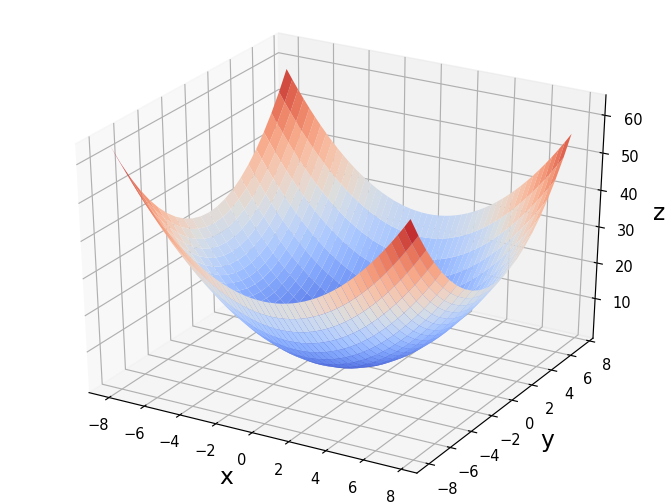

interactive(children=(IntSlider(value=10, description='Nx', max=64, min=2, step=4), IntSlider(value=10, descri…

In [15]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 1
%aimport grid_test
grid_test.plot();

The implementation of $\vec{k}^2$, which we need for $A$, is a bit more tricky. We will take a little digression on discrete fourier transformation. A spacial array with N elements:

\begin{equation}
\left[x\right] = \frac{L}{2}\left[-1,-1+a,-1+2a,...,1-a\right]
\end{equation}
with $a=1/N$ can lead to the following array for $k$:
\begin{equation}
\left[k\right] = \frac{2\pi}{L}\left[0,1,2,....,N-1\right]
\end{equation}
This way we can transform a function $f(x)$ to:
\begin{equation}
f^*(k)=\sum_{\left[x\right]}e^{-ikx}f(x)
\end{equation}
and we can also transform it back by:
\begin{equation}
f(x) = \frac{1}{2\pi}\sum_{\left[k\right]}e^{ikx}f^*(k)
\end{equation}
Basically, this is what the fft and ifft function from numpy do (a bit more clever, see [Documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)).<br>
Let's try something:

In [9]:
N=10
x = np.arange(0,10)
print(x)
print(np.fft.ifft(np.fft.fft(x)))

[0 1 2 3 4 5 6 7 8 9]
[0.-1.77635684e-16j 1.+0.00000000e+00j 2.+1.43710287e-16j
 3.+0.00000000e+00j 4.-5.48924451e-17j 5.+0.00000000e+00j
 6.-5.48924451e-17j 7.+0.00000000e+00j 8.+1.43710287e-16j
 9.+0.00000000e+00j]


We see that up to floating point errors we get the same result as we should. Not very surprising. However, what _is_ surprising is that we didn't need to define any array for $\left[k\right]$ when we applied fft and ifft. How do these functions know which $k$ to use in the equation. The answer is: default settings. There is a default way in which $\left[k\right]$ is constructed inside those functions. For the array $\left[x\right]$ above it is:
\begin{equation}
\left[k\right] = \frac{2\pi}{L}\left[0,1,2,...,\frac{N}{2}-1,0,-\frac{N}{2}+1,....-2,-1\right]
\end{equation}
We wouldn't care about this at all if it wasn't for multiplying the fourier transfrom with $e^{-i\vec{k}^2/2}$. On one hand, we have to arange it in this way to be compatible with fft and ifft. On the other hand there is another property we have to respect. The term $e^{-i\vec{k}^2/2}$ is not periodic in the k space. Thus, we need to pay more attention on the choice of the latter. Replacing the laplacian with its fourier equivalent requires the consistency concering its eigenvalues. Those are negative and positive likewise. To conserve the spectrum the chosen arrangement becomes a necessity (again, see [Spectral Methods](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=6&ved=2ahUKEwiwuc33q6DhAhUDZlAKHdASACAQFjAFegQIAhAC&url=https%3A%2F%2Fwww.mech.kth.se%2F~ardeshir%2Fcourses%2Fliterature%2FNotes_Spectral_Methods.pdf&usg=AOvVaw2G23U4FMzxOVyBD69HG1YP)). After that we can again set up a meshgrid for two dimensions and directly calculate $\vec{k}^2=k_x^2+k_y^2$ with genk2:

In [10]:
def genk2(Lx,Nx,Ly,Ny):
    kx1, ky1 = range(Nx//2), range(Ny//2)
    kx2, ky2 = range(-Nx//2+1,0),range(-Ny//2+1,0)
    
    kx = 2*pi*np.array([*kx1,0,*kx2])/Lx
    ky = 2*pi*np.array([*ky1,0,*ky2])/Ly
    
    k2xm, k2ym = np.meshgrid(kx**2,ky**2)
    return k2xm+k2ym

Let's talk about boundary conditions. A feature of the fourier transfrom approach in the solution of the equation is, that it comes with periodic boundary conditions. In the fourier picture the function we handed over is thought to be extended infinitely along the coordinate axis with periodicity $L$. This is one feature of the so called "global" characteristic of the spectral method. Using this picture in your mind you can use some tricks to change the boundary conditions to Dirichlet or von Neumann ones. More on that in the 2D Scattering notebook. <br>
We have two things left to take care of: the initial condition and the external potential. For the initial condition a smooth, normalized function seems appropriate. So why not simply choose a 2D gausian for now:
\begin{equation}
\psi_0=\frac{1}{\sqrt{\pi}}\exp{\left[-\frac{1}{2}\left(x^2+y^2\right)\right]}
\end{equation}

In [11]:
from math import pi
def initial_psi(xx,yy):
    return 1/np.sqrt(pi)*np.exp(-0.5*(xx**2+yy**2))

Again, we have a look at the initial state of our system depending on the meshgrid resolution.

<IPython.core.display.Javascript object>


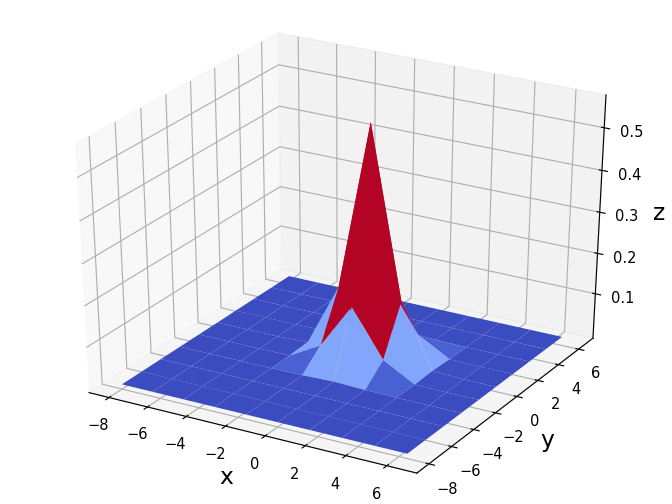

interactive(children=(IntSlider(value=10, description='Nx', max=64, min=2, step=4), IntSlider(value=10, descri…

In [12]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 1
%aimport initial_test
initial_test.plot();

Finally, we can define the external potential. In chapter 2 we found, that we wouldn't expect a stable condensate without an external potential. During chapter 3 we discussed a harmonic one. Thats why we will consider both scenarios:

\begin{equation}
U_{ext,1}=0 \\
U_{ext,2}=\frac{x^2+y^2}{2}
\end{equation}

In [13]:
def genU_ext(index, xx, yy):
    if index == 1:
        return 0
    elif index == 2:
        return 1/2*(xx**2+yy**2)
    else:
        print("Wrong index for potential. Choose 1 or 2")

We defined all components needed for the simulation. We started with the core, the Strang splitting, went over to the time array and the spacial meshgrid and the corresponding fourier meshgrid and finalised with the initial condition and the external potential. We will now put everything together to one function gpe_solve:

In [14]:
def gpe_solve(Lx,Nx,Ly,Ny,tf,dt,K,index):
    t=time_axis(tf,dt)
    Nt=len(t) # number of time steps
    xx,yy = spacial_grid(Lx,Nx,Ly,Ny)
    k2 = genk2(Lx,Nx,Ly,Ny)
    A = genA(k2)
    psi = initial_psi(xx,yy)
    U_ext = genU_ext(index,xx,yy)

    psi2_arr = np.zeros([Nt+1,Nx,Ny]) #saving result for each time step in array
    for n in range(2,Nt+2):
        psi = strang_splitting(psi,A,dt,U_ext,K)
        psi2_arr[n-2]=np.abs(psi)**2
        
    return xx, yy, psi2_arr[:Nt]

# Grand Finale

If our calculations are correct and we did the implementation the right way, we should be able to produce a first simulation of the BEC. We will set up some parameters for the first test run. Remember that from what we've found out in chapter 2 we would expect the BEC to be instable without external potential. So let's choose the index of the potential to be 1 to check. The box after the following will require some patience from you. We will show an animation of the test run. This will take about 10 seconds to construct depending on your hardware and spacial resolution of the simulation.

In [15]:
Lx = 16
Nx = 32
Ly = 16
Ny = 32
tf = 5
dt = 0.01
K = 1
index = 1 # 1 => no potential, 2 => quadratic potential

xx, yy, u = gpe_solve(Lx,Nx,Ly,Ny,tf,dt,K,index)

In [16]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport ani_bose_2d
anim = ani_bose_2d.animate(xx, yy, u)
anim

In fact, the BEC diverges. Towards the end you can observe a feature of the periodic boundary conditions. The BEC interferes with itself on the opposite side as it surpasses the boundaries. To avoid this within the time limit one needs to extend the spacial grid. Maintaining the same resolution would require to increase the number of spacial steps, accordingly.<br>

We prepared another interactive plot for you. You will see the maximum of $\psi^2$ plotted against the time. By changing the value of K you can see the influence of the interaction strength on the evolution of the BEC. A negative K means, that the interaction is attractive. Try to do the same with an applied harmonic potential. Do you see special features arise? Feel free to run the algorithm with adjusted parameters and watch the animation, again. Please stop the animation before you continue.

<IPython.core.display.Javascript object>


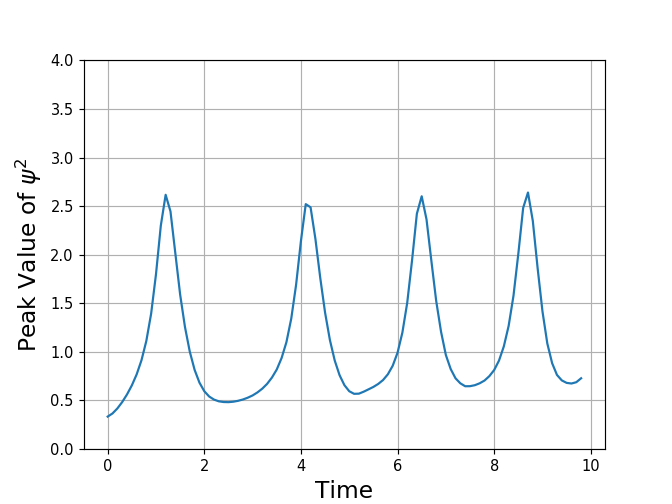

interactive(children=(FloatSlider(value=0.0, description='K', max=10.0, min=-10.0, step=0.01), RadioButtons(de…

In [16]:
# PLEASE STOP ANIMATION BEFORE RUNNING
%matplotlib notebook
%reload_ext autoreload
%autoreload 1
%aimport max_trace
max_trace.plot(gpe_solve);

We won't go into detailed explanations of all the things that are observable this way. In fact, the purpose of this notebook is to make you curious on computational physics and exactly those things. Only keep in mind, that the kinetic energy does always contribute in a dispersing way on the evolution and for K=0 we simply solve the Schrödinger equation in 2D. The following two references may be a good starting point for further exploration: [Breathing Modes](https://iopscience.iop.org/article/10.1088/1367-2630/16/1/013001), [Feshbach Resonances](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=7&ved=2ahUKEwiEv-yfnKXhAhVEZFAKHeS4AqcQFjAGegQIBxAC&url=https%3A%2F%2Farxiv.org%2Fpdf%2F0812.1496&usg=AOvVaw16fOFPtTRmV-V3d-J4wqg6).